In [48]:
# Carrega as bibliotecas
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier # importa o Decision Tree Classifier
from sklearn.model_selection import train_test_split # importa o método train_test_split 
from sklearn import metrics #importa as métricas de avaliação de modelos do scikit-learn

In [49]:
#!conda install graphviz -y

#!conda install pydotplus -y
!conda update -n base -c conda-forge conda -y

^C

CondaError: KeyboardInterrupt



In [50]:
# Carrega o dataset
my_data = pd.read_csv("drug200.csv", delimiter=",")
my_data[0:5]


,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [51]:
my_data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [52]:
my_data.shape

(200, 6)

In [53]:
# REmove a coluna que nao contem valores numericos
X = my_data[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']].values
X[0:5]
y = my_data["Drug"]
y[0:5]

0    DrugY
1    drugC
2    drugC
3    drugX
4    DrugY
Name: Drug, dtype: object

In [54]:
#CONVERTE OS VALORES CATEGORICOS EM NUMERICOS COMO SEX E BP


from sklearn import preprocessing
le_sex = preprocessing.LabelEncoder()
le_sex.fit(['F','M'])
X[:,1] = le_sex.transform(X[:,1]) 


le_BP = preprocessing.LabelEncoder()
le_BP.fit([ 'LOW', 'NORMAL', 'HIGH'])
X[:,2] = le_BP.transform(X[:,2])


le_Chol = preprocessing.LabelEncoder()
le_Chol.fit([ 'NORMAL', 'HIGH'])
X[:,3] = le_Chol.transform(X[:,3]) 

X[0:5]

array([[23, 0, 0, 0, 25.355],
       [47, 1, 1, 0, 13.093],
       [47, 1, 1, 0, 10.114],
       [28, 0, 2, 0, 7.798],
       [61, 0, 1, 0, 18.043]], dtype=object)

In [55]:
# Separa o conjunto de dados em treinamento e teste

from sklearn.model_selection import train_test_split
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)
print("X_trainsetX SHAPE:  " + str(X_trainset.shape))
print("y_trainsetX SHAPE:  " + str(y_trainset.shape))
print("X_testsetX SHAPE:  " + str(X_testset.shape))
print("y_testsetX SHAPE:  " + str(y_testset.shape))

X_trainsetX SHAPE:  (140, 5)
y_trainsetX SHAPE:  (140,)
X_testsetX SHAPE:  (60, 5)
y_testsetX SHAPE:  (60,)


In [56]:
# Cria o objeto classificador para a árvore de decisão

drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)

# Treina o modelo com o conjunto de treinamento

drugTree.fit(X_trainset,y_trainset)

# Faz a predição com o conjunto de teste

predTree = drugTree.predict(X_testset)
print (predTree [0:5])
print (y_testset [0:5])

['DrugY' 'drugX' 'drugX' 'drugX' 'drugX']
40     DrugY
51     drugX
139    drugX
197    drugX
170    drugX
Name: Drug, dtype: object


In [60]:
# Apresenta a acurácia do modelo
print("Accuracy:",metrics.accuracy_score(y_testset, predTree))
print("Precision:",metrics.precision_score(y_testset, predTree, average='weighted'))
print("Recall:",metrics.recall_score(y_testset, predTree, average='weighted'))
print("F1 Measure:",metrics.f1_score(y_testset, predTree, average='weighted'))


Accuracy: 0.9833333333333333
Precision: 0.9840579710144927
Recall: 0.9833333333333333
F1 Measure: 0.9833152664859981


In [62]:
# Utiliza o pickle para salvar o modelo treinado para uso posterior em alguma aplicação
import pickle
filename = 'finalized_model.sav'
pickle.dump(predTree, open(filename, 'wb'))

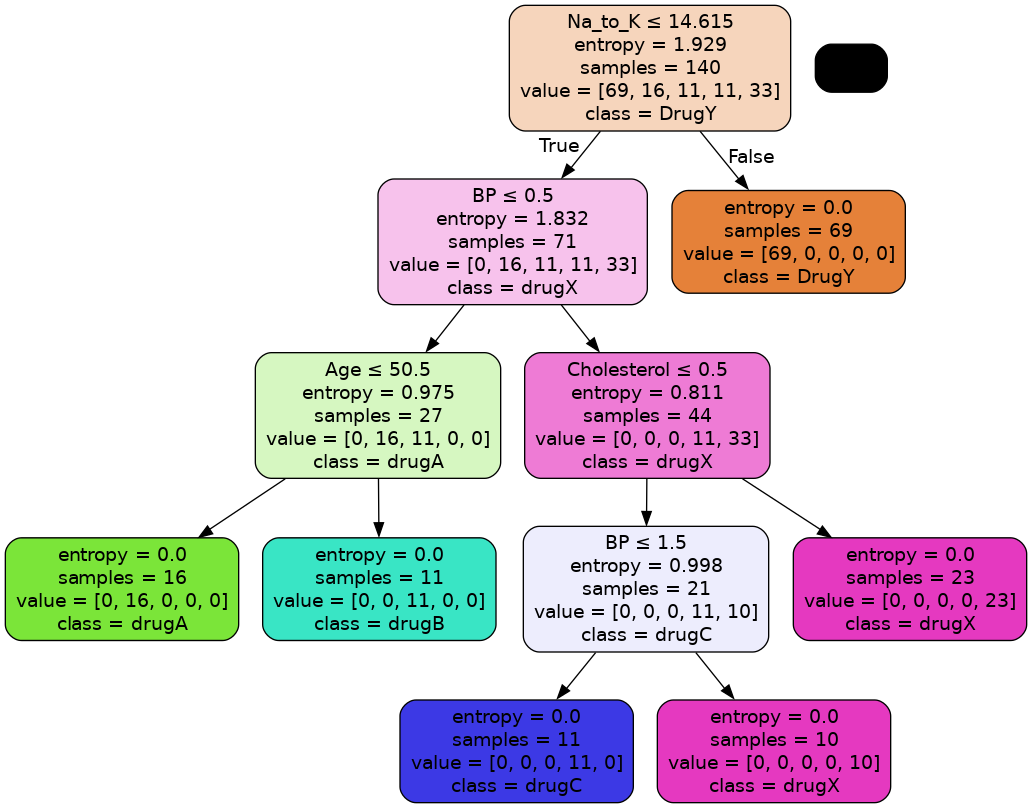

In [73]:
#Visualiza a árvore de decisão
from sklearn.tree import export_graphviz
from six import StringIO  
import pydotplus




dot_data = StringIO()
filename = "drugtree.png"
featureNames = my_data.columns[0:5]
export_graphviz(drugTree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = featureNames,class_names= np.unique(y_trainset), rotate=False)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
Image(graph.create_png())
